In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:


---
A Cherenkov gamma telescope uses the imaging technique to observe high energy gamma rays by detecting the radiation emitted by charged particles in electromagnetic showers. The telescope records the Cherenkov radiation in the atmosphere, allowing for the reconstruction of shower parameters. The available information includes pulses from Cherenkov photons on photomultiplier tubes, which form patterns that can statistically discriminate between primary gamma signals and background cosmic ray showers.

---
\\

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]. https://doi.org/10.24432/C52C8B.

\\






In [2]:
cols=['fLength', 'fWidth', 'fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans', 'fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].unique() #gammas or hadrons

array(['g', 'h'], dtype=object)

The computer is really good at understanding numbers, we're going to convert this to one for "g" and zero for "h", or viceversa it doesn't really matter.

In [4]:
df['class']=(df['class']=='g').astype(int)

This is actually supervised learning.


In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

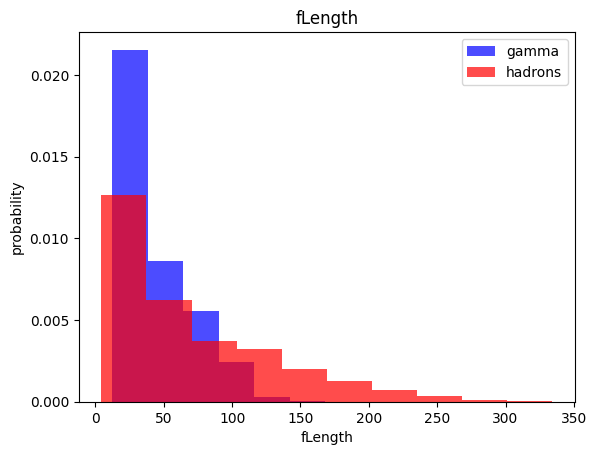

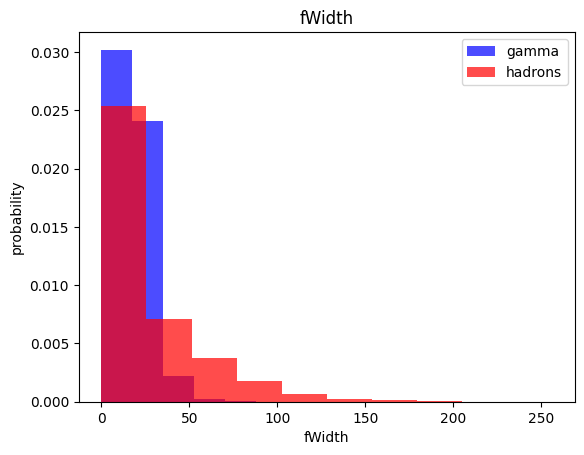

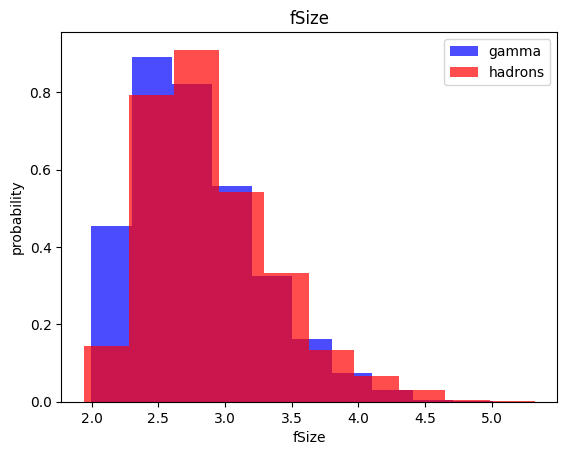

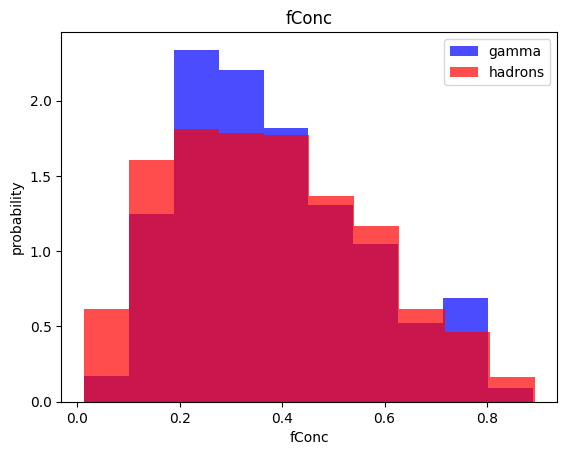

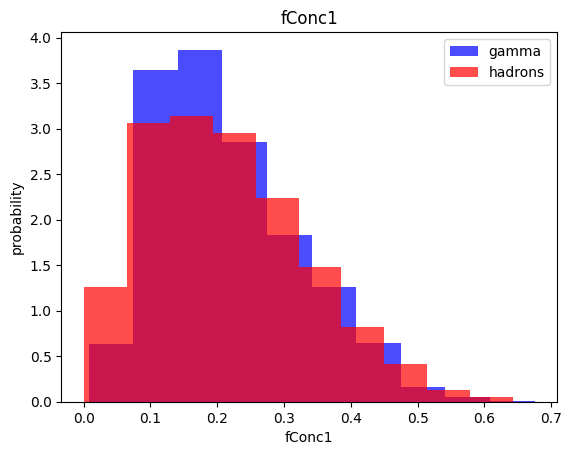

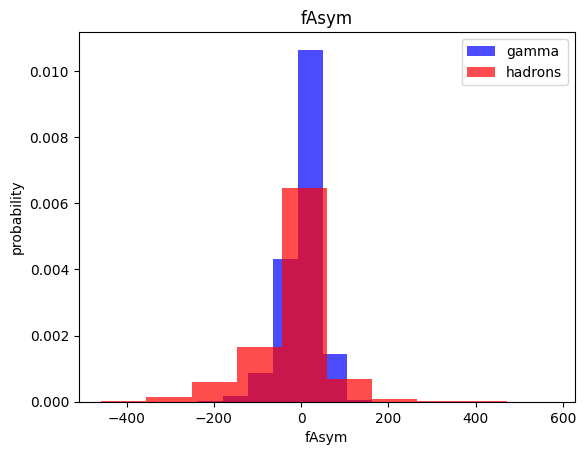

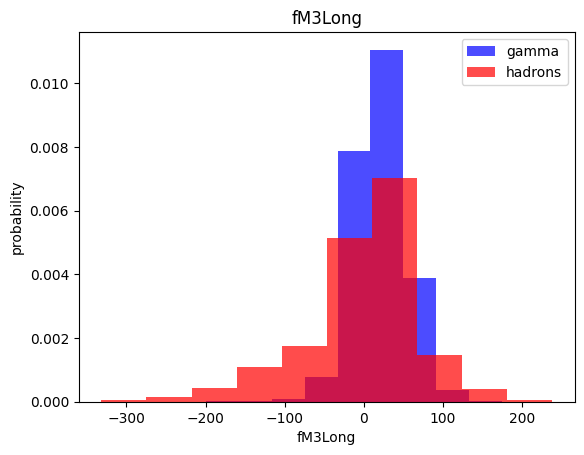

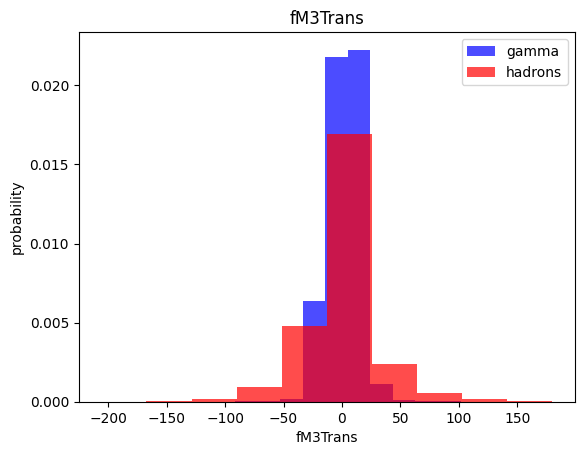

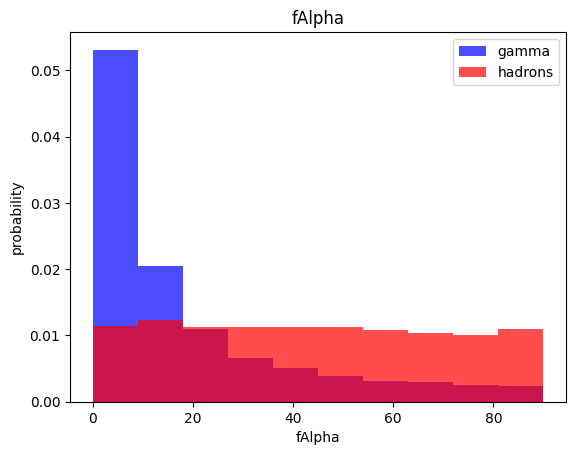

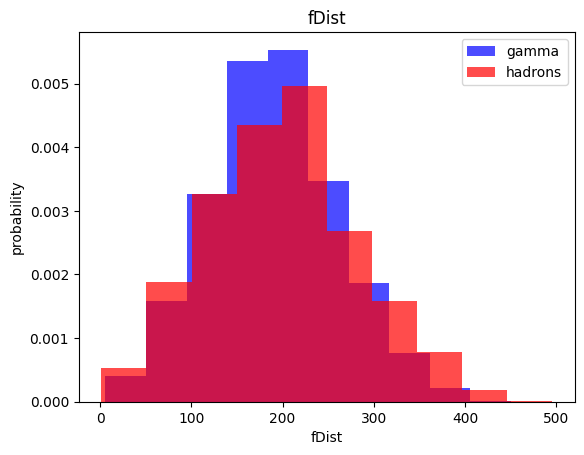

In [6]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadrons', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [7]:
train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

This basically means everything between 60% and 80% of the length of the dataset will go towards validation. Like everything from 80% to 100%, I'm going to pass my test data.

In [8]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values #last colums

  scaler=StandardScaler()  #We use this because in the dataset we have a maybe big difference between the scale in the data, for example
                           #a value in the colum fLength is 162.05 and in the fConc is 0.037
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [9]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0])) #hadrons

7369
4043


In [10]:
train, x_train, y_train=scale_dataset(train, oversample=True)
valid, x_valid, y_valid=scale_dataset(valid, oversample=False)
test, x_test, y_test=scale_dataset(test, oversample=False)

I implemented different models for the same data set: K-nearest neighbors, Naive Bayes, Logistic Regression, and  Support Vector Machines. With the objective of obteined the best model taking into account the different parameters (accuracy, precision, recall, etc).

#kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model=KNeighborsClassifier(n_neighbors=1) #That means my neighbors is only one, we use a K equal to a logical number depending on how big my data set is.
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_pred=knn_model.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70      1309
           1       0.83      0.88      0.86      2495

    accuracy                           0.81      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.81      0.80      3804



https://en.wikipedia.org/wiki/Precision_and_recall
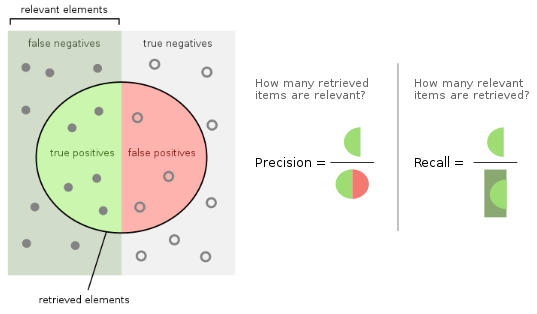

# Naive Bayes

\begin{equation}
P(c_k|x)=\frac{p(x|c_x) \cdot p(c_k)}{p(x)}
\end{equation}

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model= nb_model.fit(x_train, y_train)

In [17]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1309
           1       0.74      0.90      0.81      2495

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#Log Regression

**Sigmoid function**
\begin{equation}
S(y)=\frac{1}{1+e^{-y}}
\end{equation}

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression() #we can use different penalties, l2 is our quadratic formula.
                                #you can toggle different parameters, and you might get slightly different results.
lg_model= lg_model.fit(x_train, y_train)

In [20]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1309
           1       0.85      0.81      0.83      2495

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#SVM

In [21]:
from sklearn.svm import SVC

In [22]:
svc_model =SVC()
svc_model=svc_model.fit(x_train, y_train)

In [23]:
y_pred=svc_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1309
           1       0.89      0.89      0.89      2495

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural net

In [24]:
import tensorflow as tf

In [27]:
def plot_history(history):
  fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [30]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), #32 is the number of nodes and 'relu' correspond to the activaction function
      tf.keras.layers.Dropout(dropout_prob), #this helps prevent overfitting
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])

  history=nn_model.fit(
    x_train, y_train,epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr0.01, batch size 32


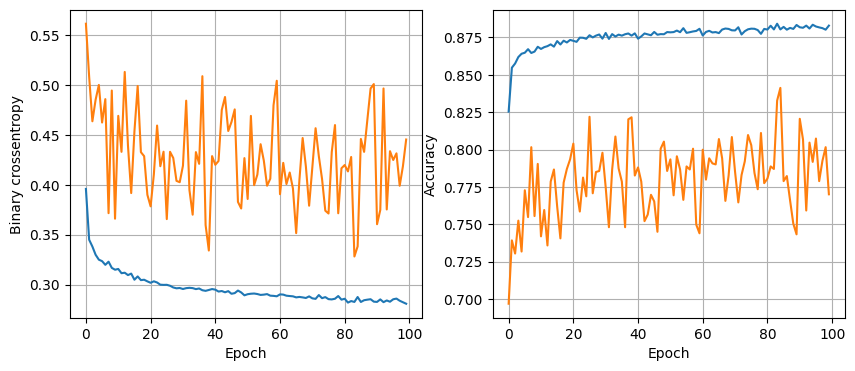

119/119 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8730
16 nodes, dropout 0, lr0.01, batch size 64


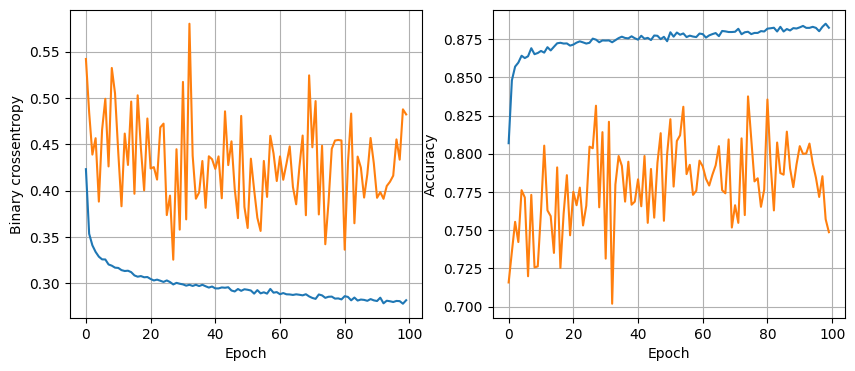

119/119 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8662
16 nodes, dropout 0, lr0.01, batch size 128


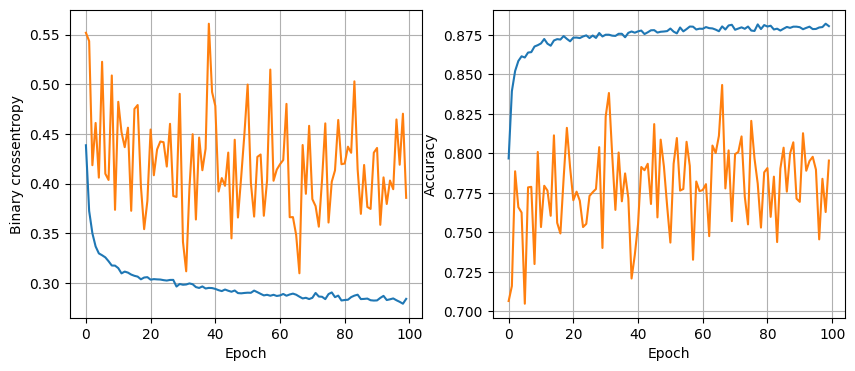

119/119 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8667
16 nodes, dropout 0, lr0.005, batch size 32


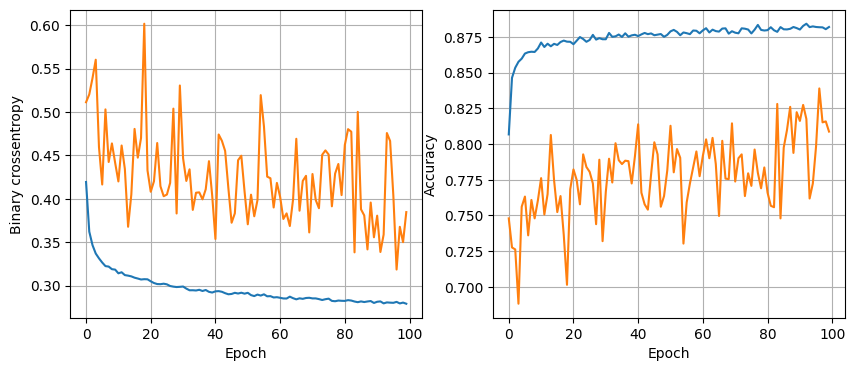

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8683
16 nodes, dropout 0, lr0.005, batch size 64


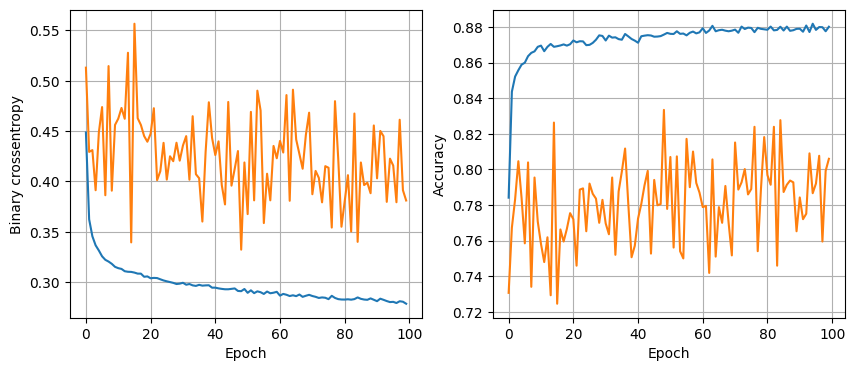

119/119 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8733
16 nodes, dropout 0, lr0.005, batch size 128


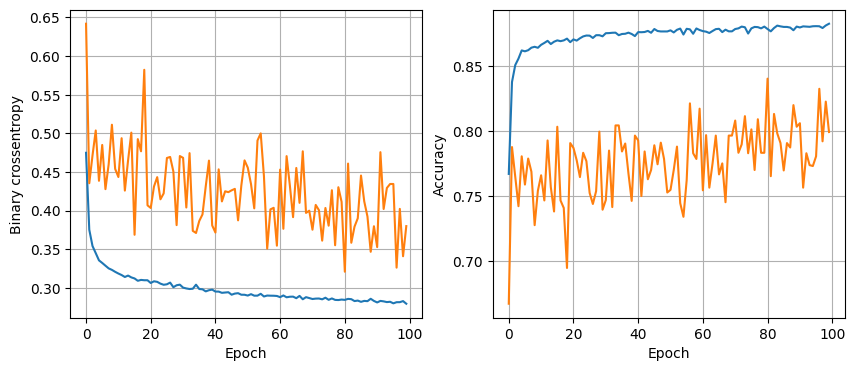

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8683
16 nodes, dropout 0, lr0.001, batch size 32


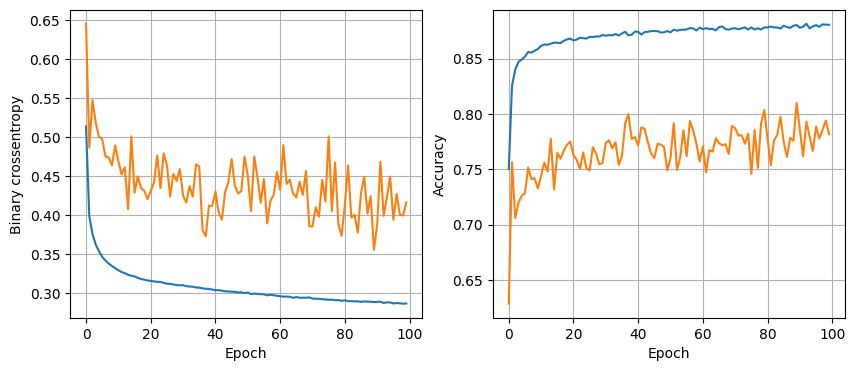

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8749
16 nodes, dropout 0, lr0.001, batch size 64


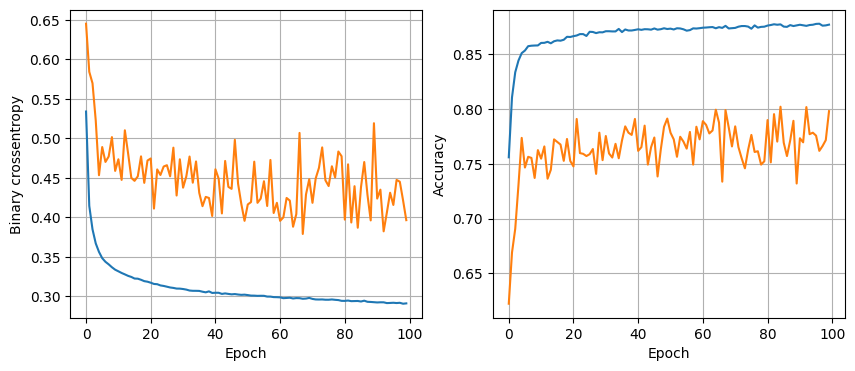

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8670
16 nodes, dropout 0, lr0.001, batch size 128


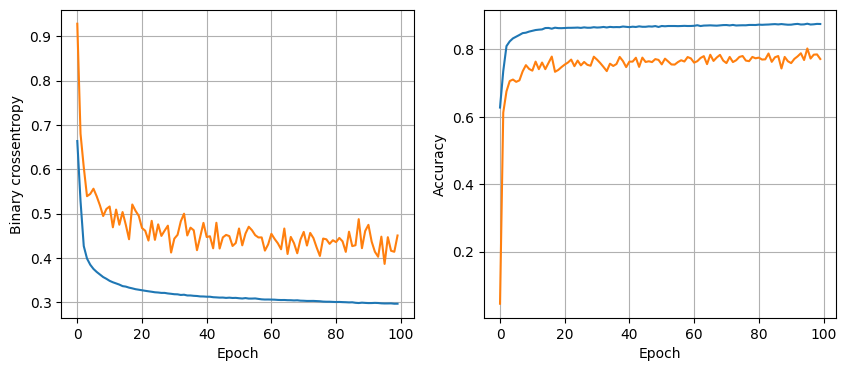

119/119 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8738
16 nodes, dropout 0.2, lr0.01, batch size 32


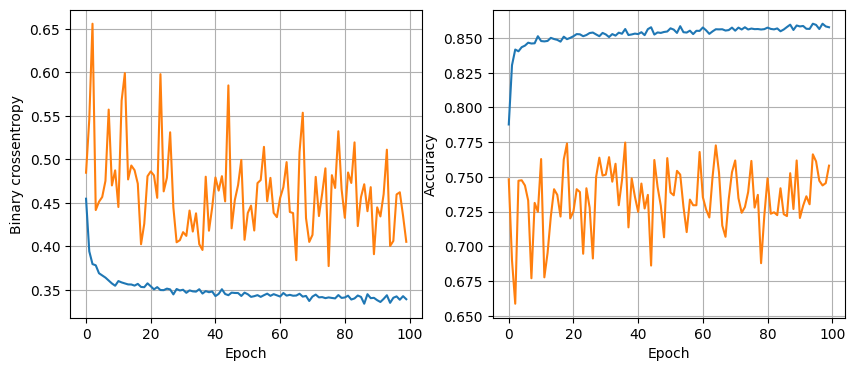

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8693
16 nodes, dropout 0.2, lr0.01, batch size 64


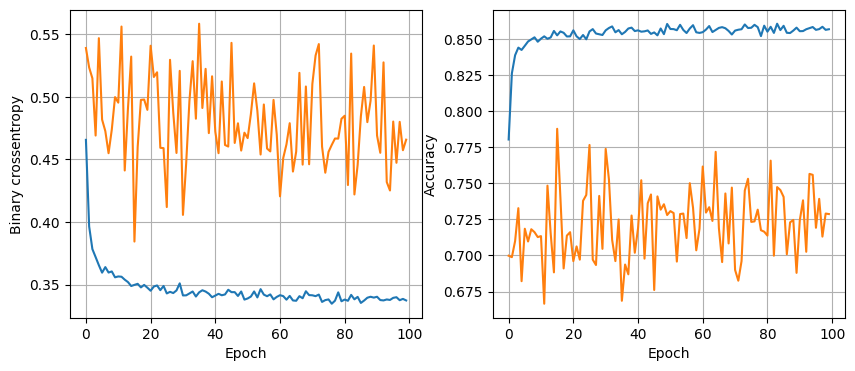

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8630
16 nodes, dropout 0.2, lr0.01, batch size 128


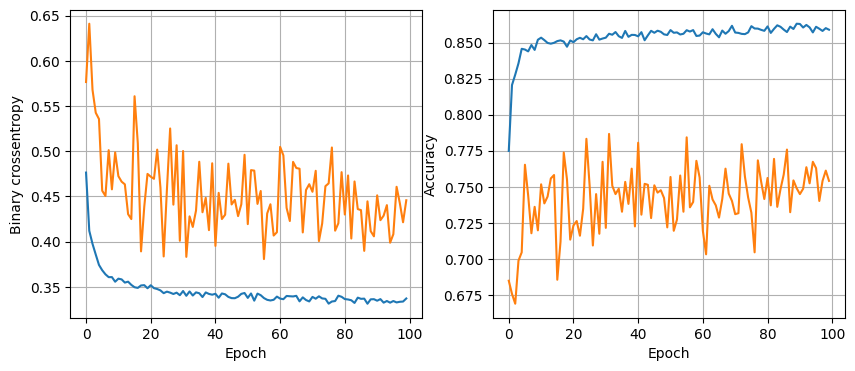

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8688
16 nodes, dropout 0.2, lr0.005, batch size 32


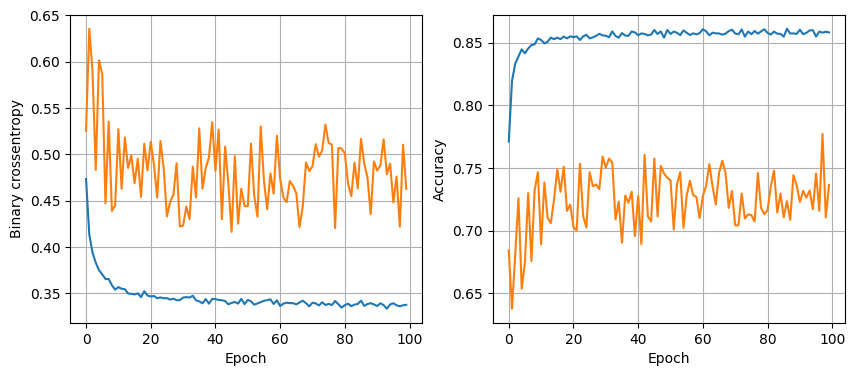

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8657
16 nodes, dropout 0.2, lr0.005, batch size 64


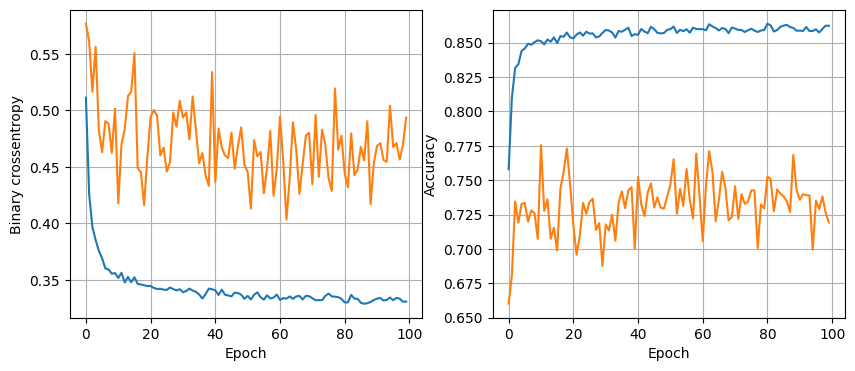

119/119 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8704
16 nodes, dropout 0.2, lr0.005, batch size 128


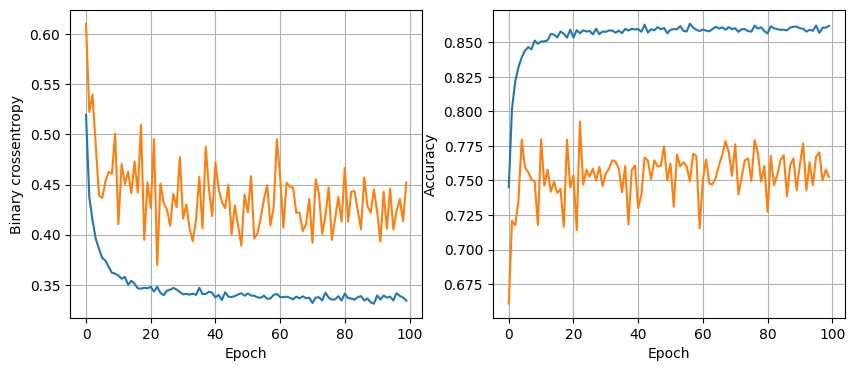

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8701
16 nodes, dropout 0.2, lr0.001, batch size 32


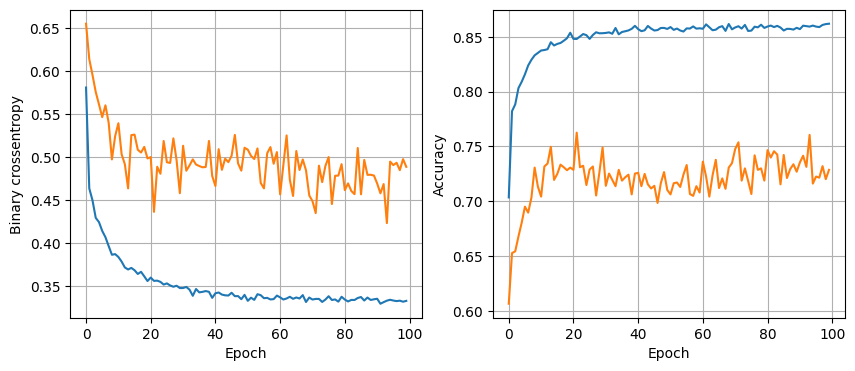

119/119 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8699
16 nodes, dropout 0.2, lr0.001, batch size 64


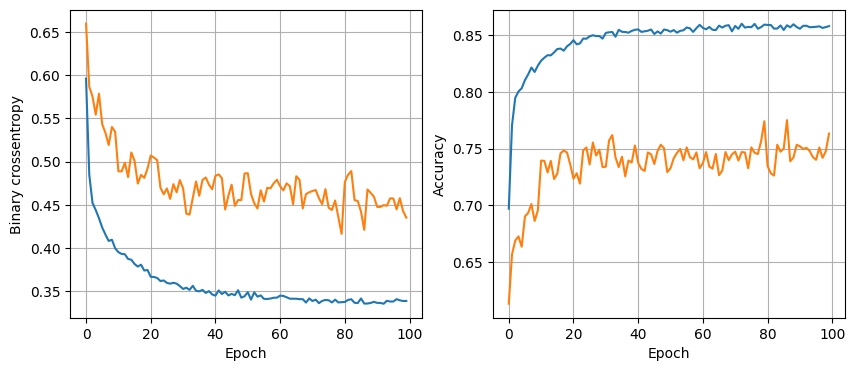

119/119 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8704
16 nodes, dropout 0.2, lr0.001, batch size 128


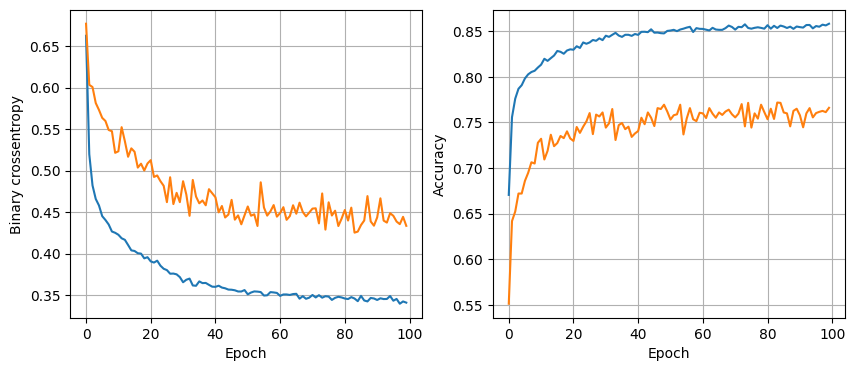

119/119 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8693
32 nodes, dropout 0, lr0.01, batch size 32


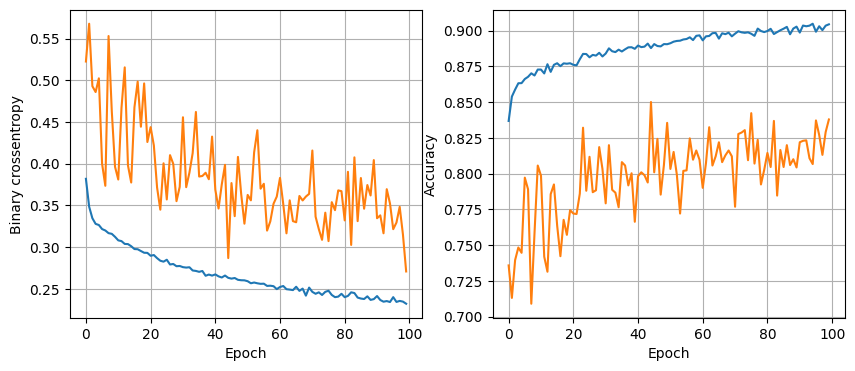

119/119 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8662
32 nodes, dropout 0, lr0.01, batch size 64


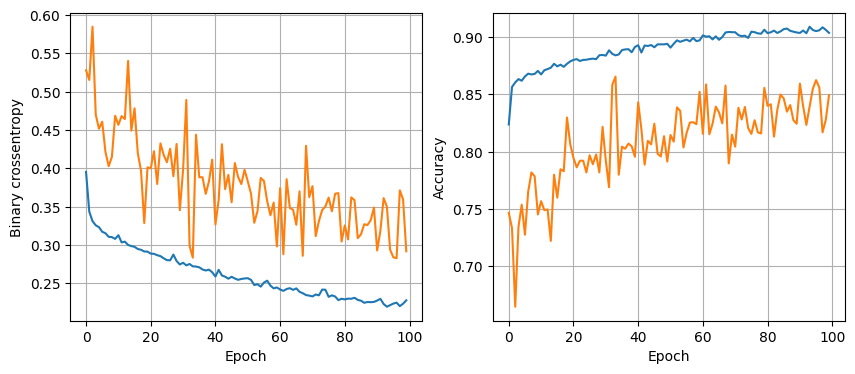

119/119 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8654
32 nodes, dropout 0, lr0.01, batch size 128


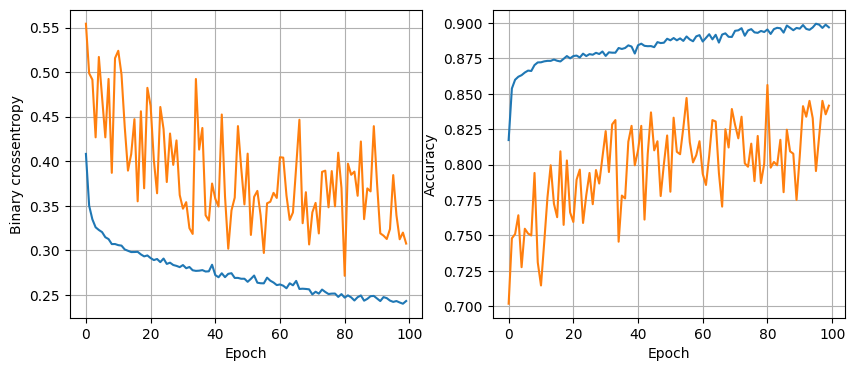

119/119 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8599
32 nodes, dropout 0, lr0.005, batch size 32


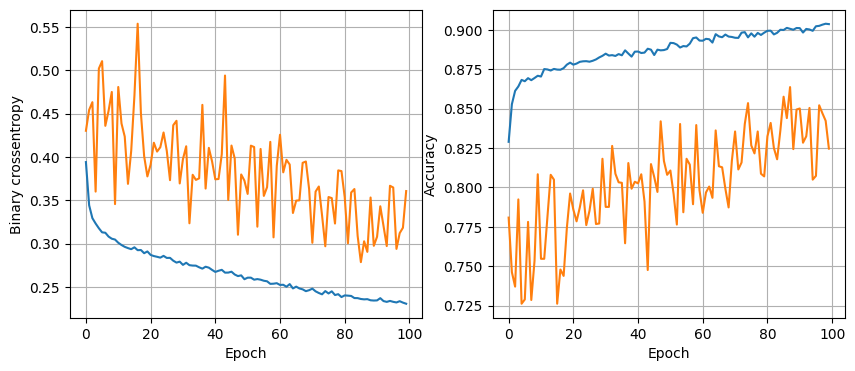

119/119 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8670
32 nodes, dropout 0, lr0.005, batch size 64


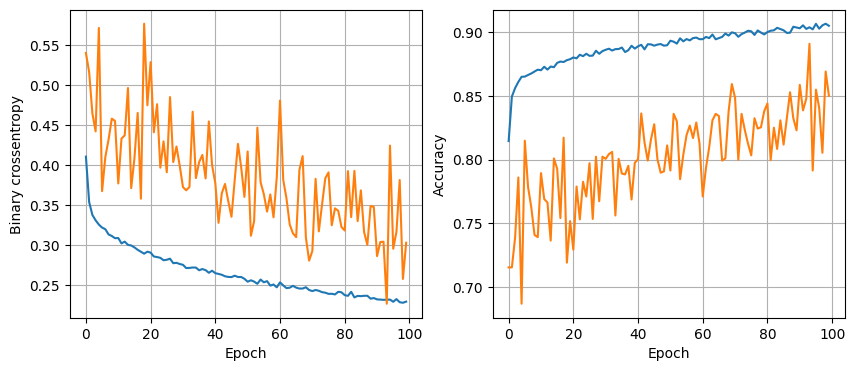

119/119 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8583
32 nodes, dropout 0, lr0.005, batch size 128


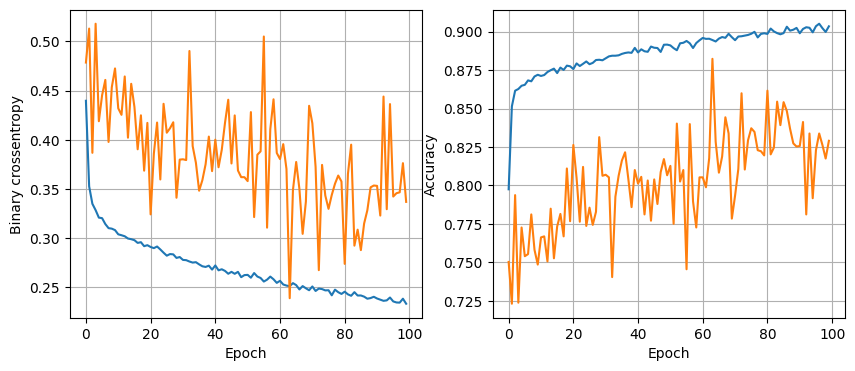

119/119 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8715
32 nodes, dropout 0, lr0.001, batch size 32


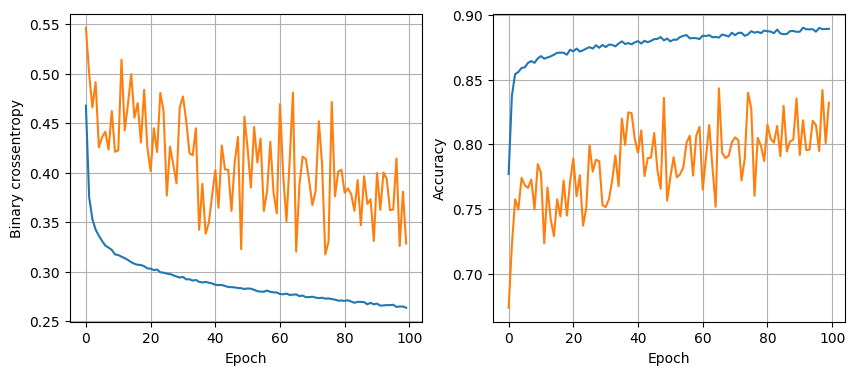

119/119 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8667
32 nodes, dropout 0, lr0.001, batch size 64


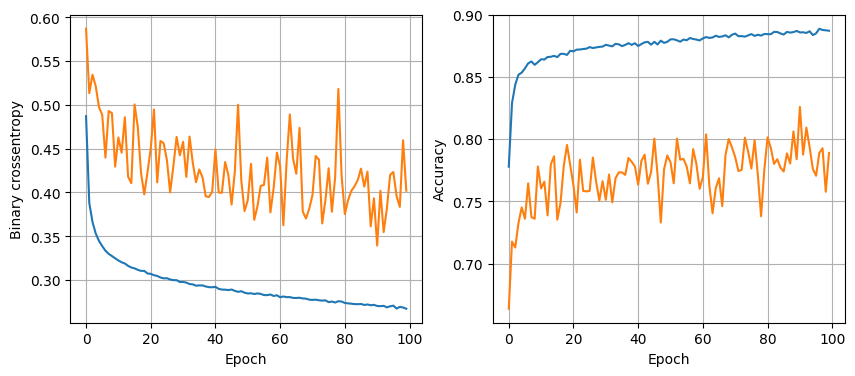

119/119 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8759
32 nodes, dropout 0, lr0.001, batch size 128


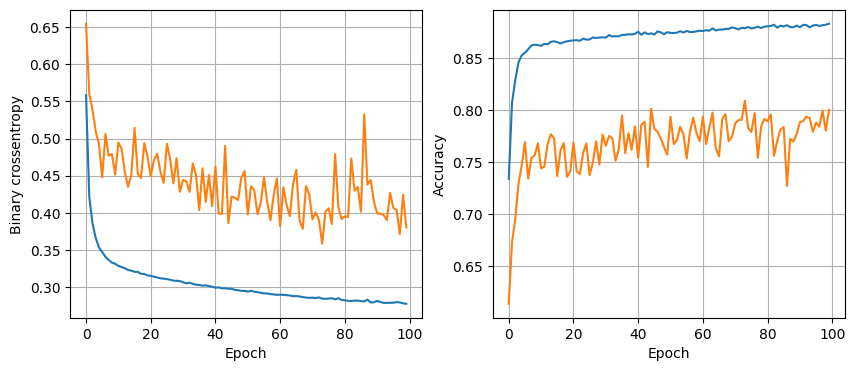

119/119 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8733
32 nodes, dropout 0.2, lr0.01, batch size 32


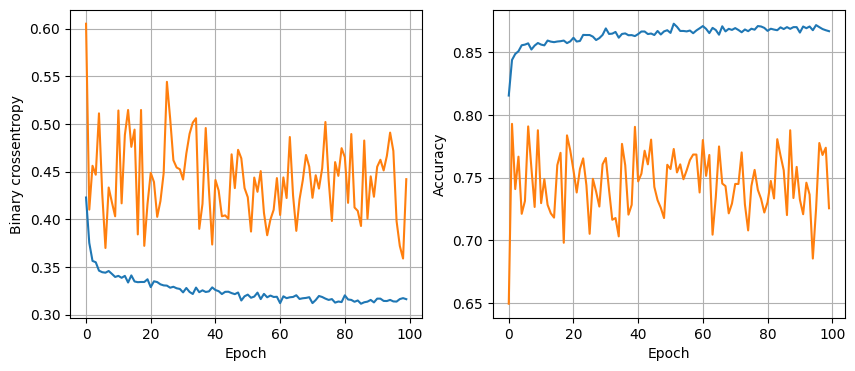

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8688
32 nodes, dropout 0.2, lr0.01, batch size 64


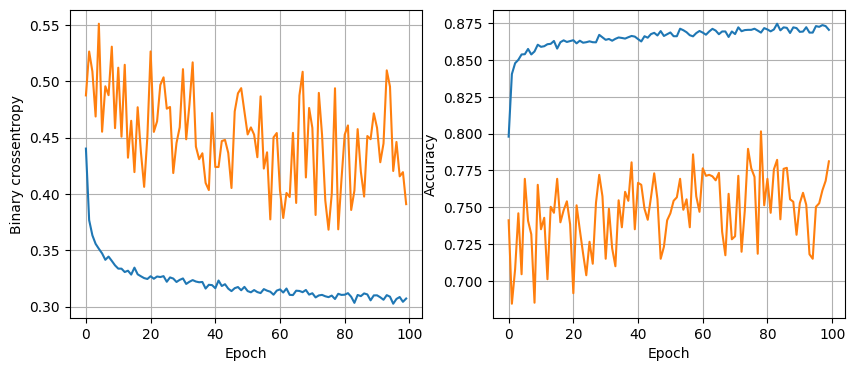

119/119 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8783
32 nodes, dropout 0.2, lr0.01, batch size 128


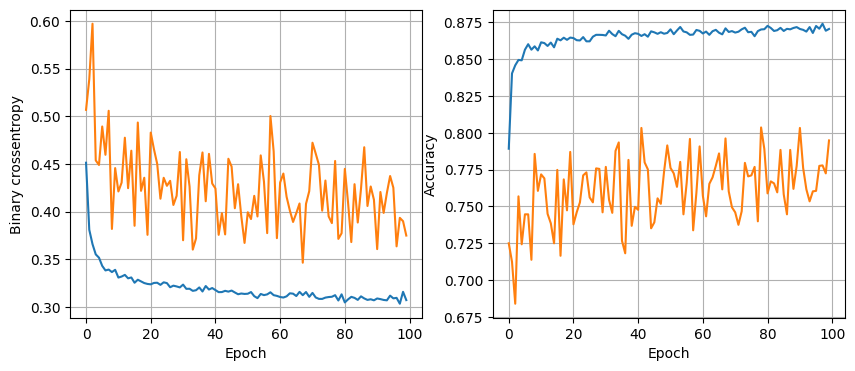

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8764
32 nodes, dropout 0.2, lr0.005, batch size 32


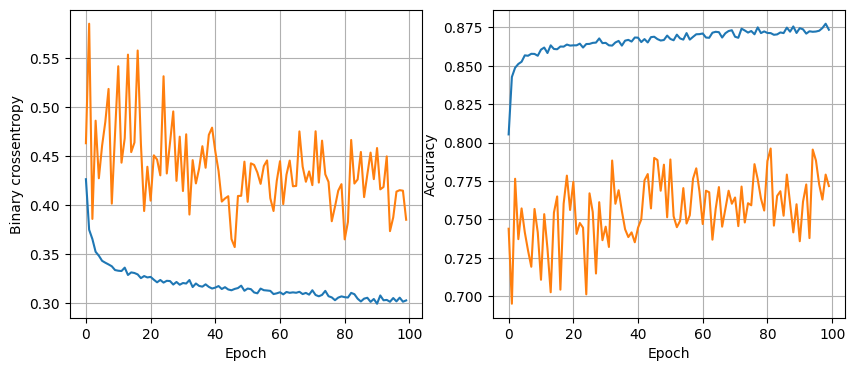

119/119 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8780
32 nodes, dropout 0.2, lr0.005, batch size 64


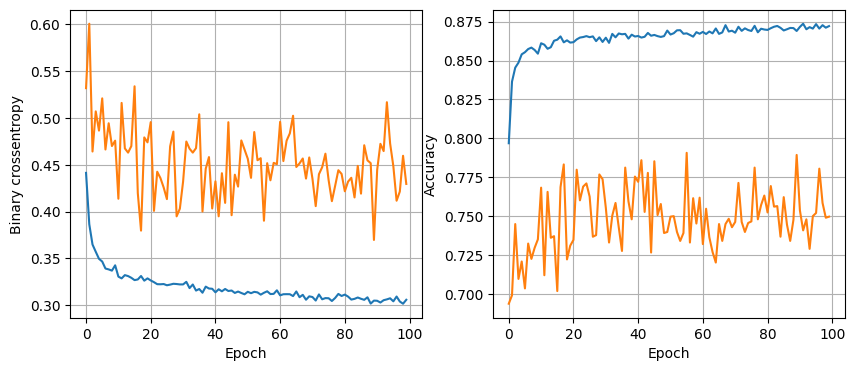

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8743
32 nodes, dropout 0.2, lr0.005, batch size 128


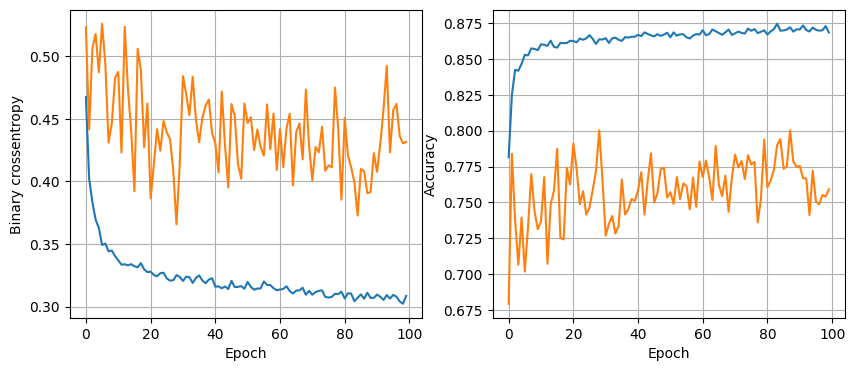

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8749
32 nodes, dropout 0.2, lr0.001, batch size 32


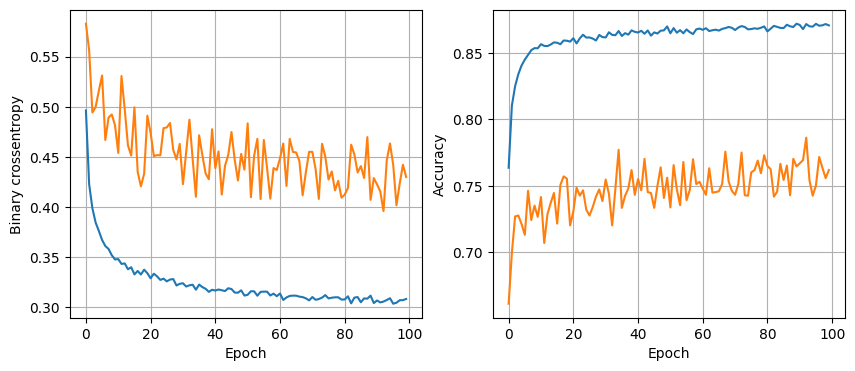

119/119 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8741
32 nodes, dropout 0.2, lr0.001, batch size 64


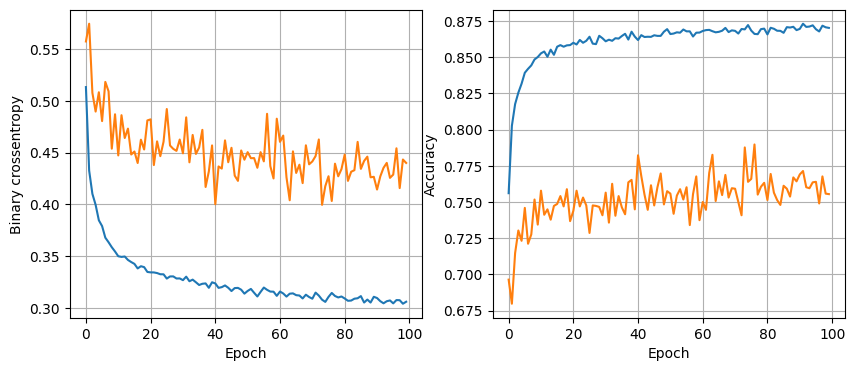

119/119 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8709
32 nodes, dropout 0.2, lr0.001, batch size 128


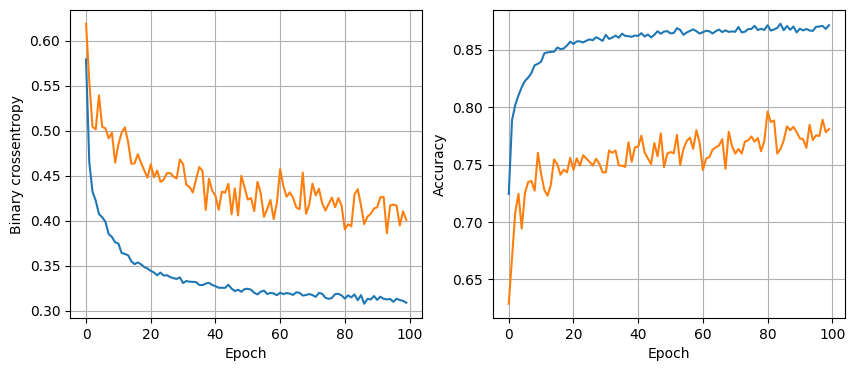

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8722
64 nodes, dropout 0, lr0.01, batch size 32


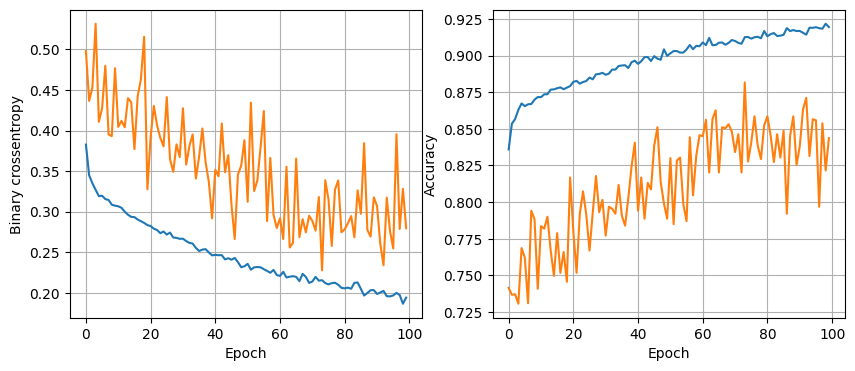

119/119 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.8654
64 nodes, dropout 0, lr0.01, batch size 64


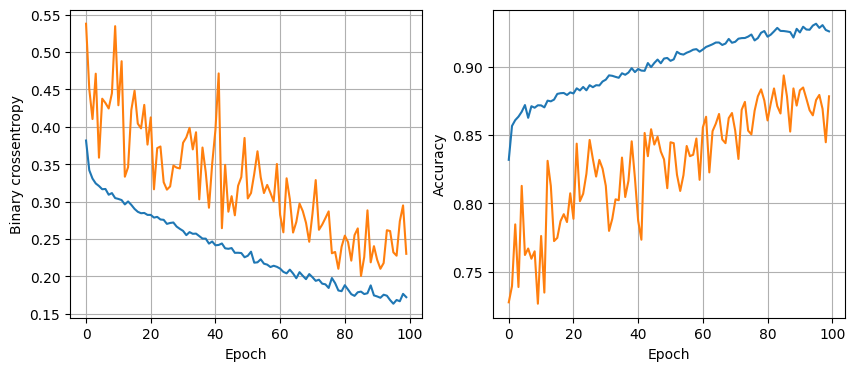

119/119 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8623
64 nodes, dropout 0, lr0.01, batch size 128


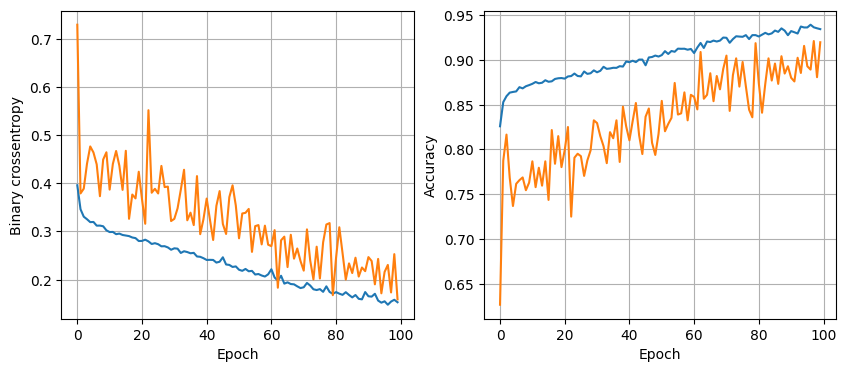

119/119 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.8533
64 nodes, dropout 0, lr0.005, batch size 32


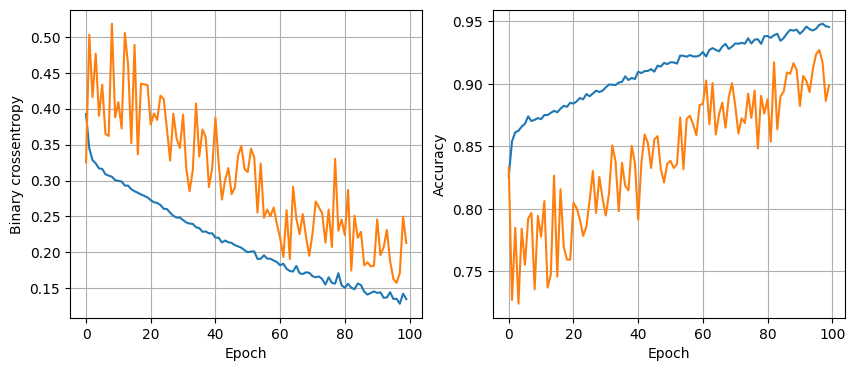

119/119 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.8520
64 nodes, dropout 0, lr0.005, batch size 64


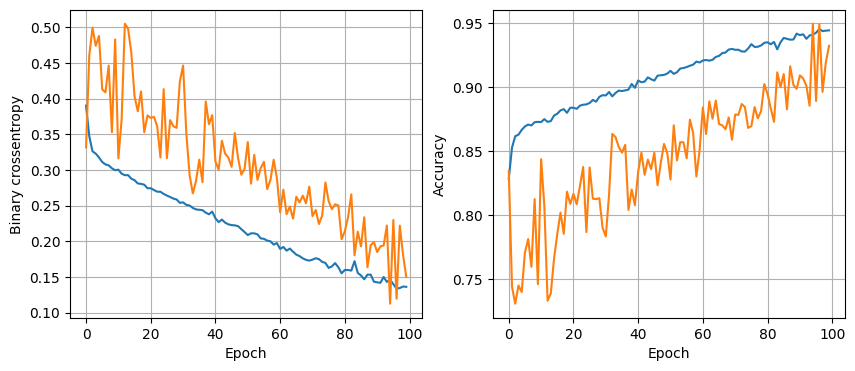

119/119 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.8520
64 nodes, dropout 0, lr0.005, batch size 128


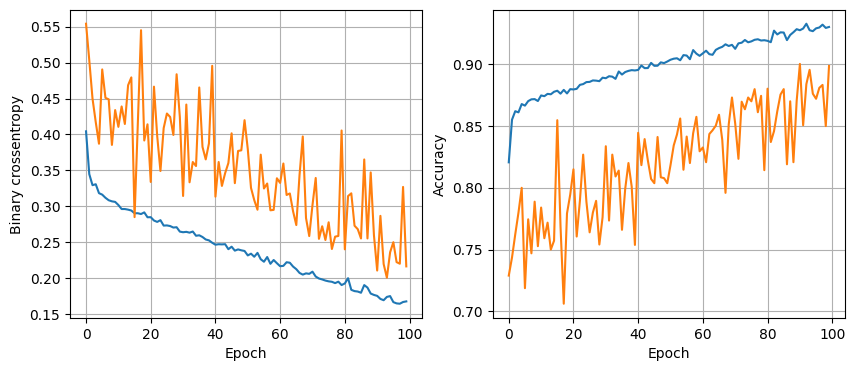

119/119 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8623
64 nodes, dropout 0, lr0.001, batch size 32


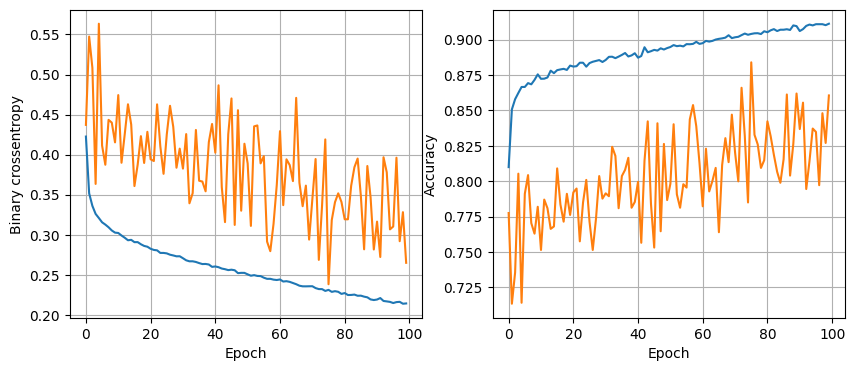

119/119 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8567
64 nodes, dropout 0, lr0.001, batch size 64


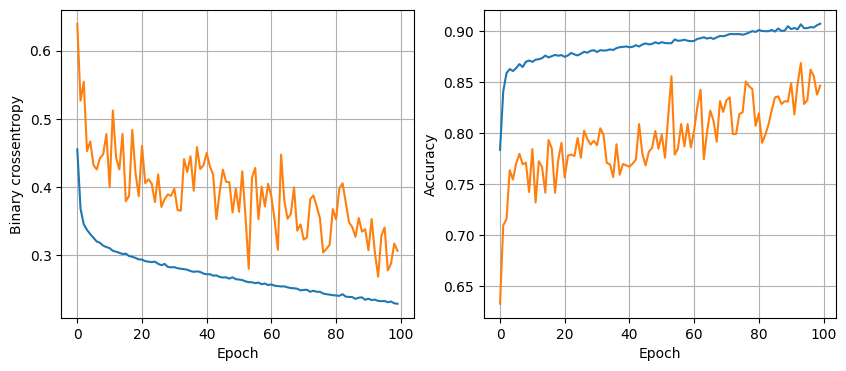

119/119 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8722
64 nodes, dropout 0, lr0.001, batch size 128


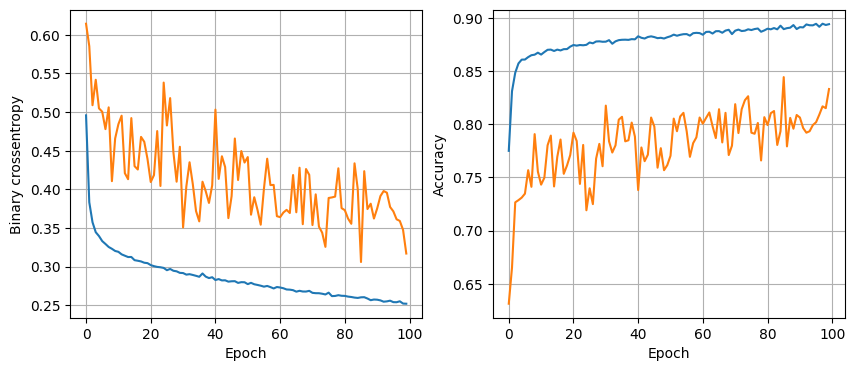

119/119 [==============================] - 0s 3ms/step - loss: 0.3242 - accuracy: 0.8665
64 nodes, dropout 0.2, lr0.01, batch size 32


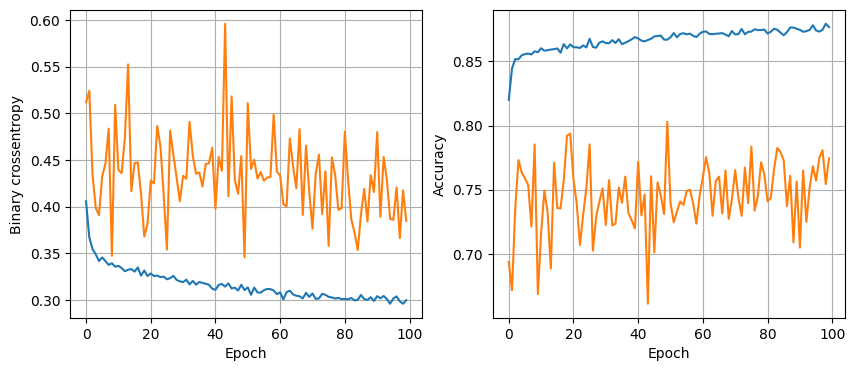

119/119 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8780
64 nodes, dropout 0.2, lr0.01, batch size 64


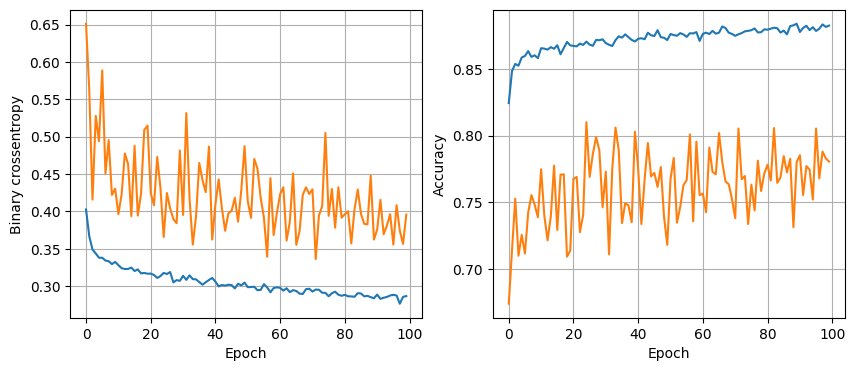

119/119 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8788
64 nodes, dropout 0.2, lr0.01, batch size 128


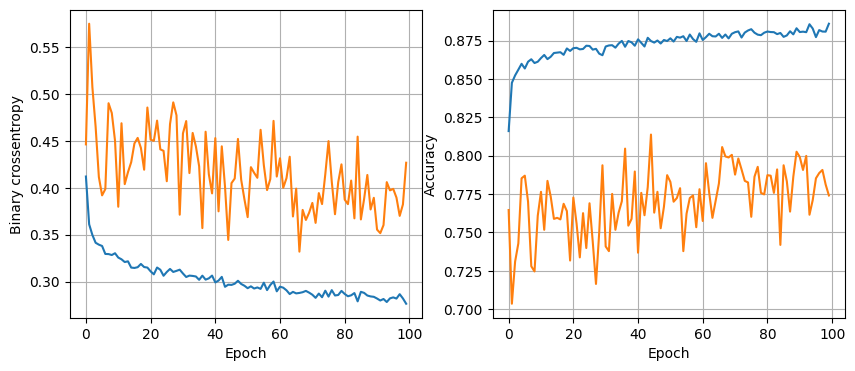

119/119 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8783
64 nodes, dropout 0.2, lr0.005, batch size 32


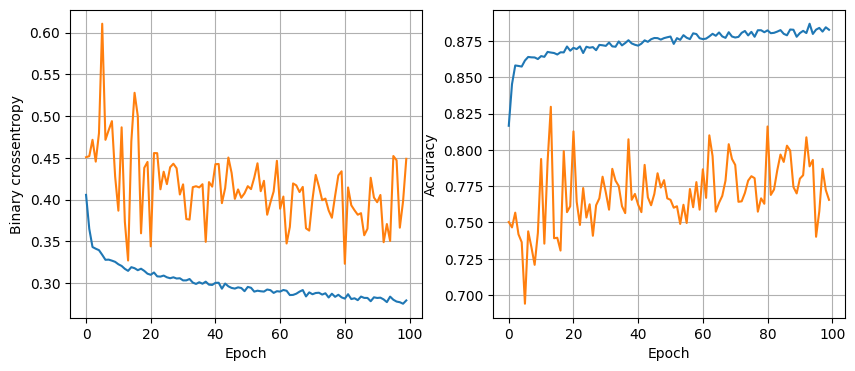

119/119 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8762
64 nodes, dropout 0.2, lr0.005, batch size 64


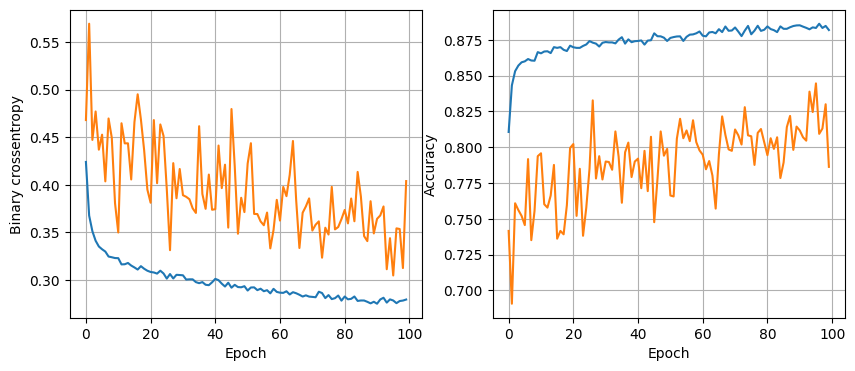

119/119 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8767
64 nodes, dropout 0.2, lr0.005, batch size 128


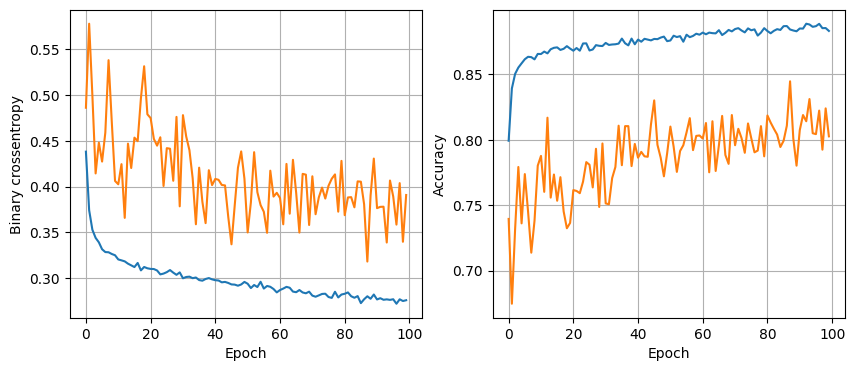

119/119 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8762
64 nodes, dropout 0.2, lr0.001, batch size 32


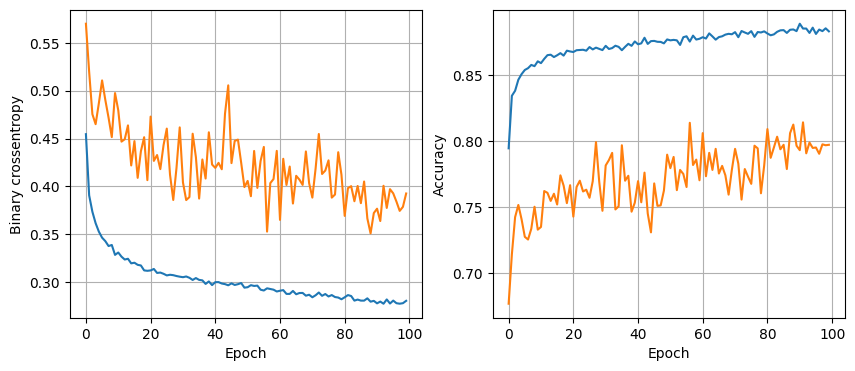

119/119 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8780
64 nodes, dropout 0.2, lr0.001, batch size 64


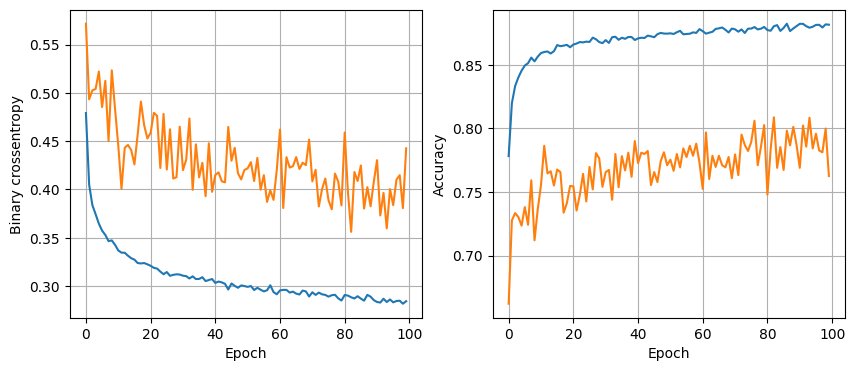

119/119 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8785
64 nodes, dropout 0.2, lr0.001, batch size 128


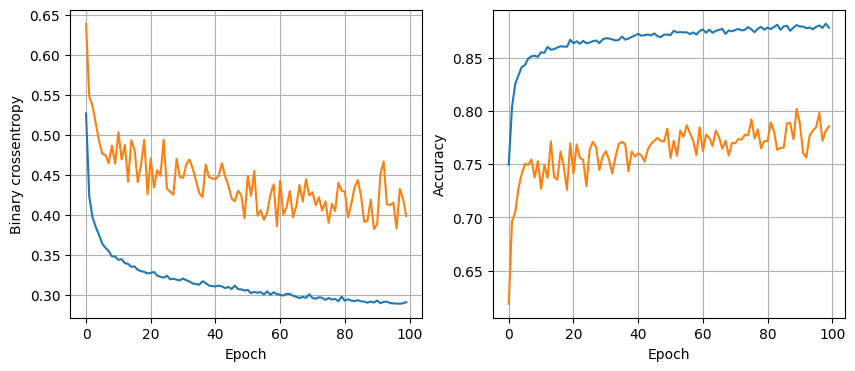

119/119 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8778


In [31]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16, 32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch size {batch_size}")
        model, history=train_model(x_train, y_train, num_nodes, dropout_prob, lr,batch_size, epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [32]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [33]:
print(classification_report(y_test, y_pred)) #it didn't really matter which one of the models we use at the end, because we obteined an 88% for the accuracy

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1309
           1       0.88      0.94      0.91      2495

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.86      3804
weighted avg       0.87      0.87      0.87      3804

